Acquisition and Analysis of Neural Data 

Exercise 05

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from estimate_decoder import estimate_decoder

sns.set(style="darkgrid", context="paper", palette="pastel")
plt.style.use('dark_background')

(a)

In [2]:
T = 500
var = 2
del_t = 5e-3 

t = np.arange(0, T, del_t)
n_samples = int(T / del_t)

In [3]:
white_stim = np.random.normal(0, var/del_t, n_samples)

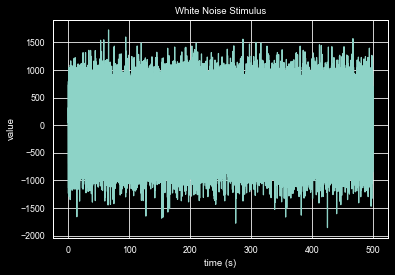

In [4]:
plt.plot(t, white_stim)
plt.title('White Noise Stimulus')
plt.xlabel('time (s)')
plt.ylabel('value')
plt.show()

(b)

In [138]:
def get_r_est(r0, kernel, stimulus, del_t):
    return r0 + np.convolve(stimulus, kernel) * del_t

In [139]:
def d_kernel(time_points, A = 200, tau_cos = 20e-3, sigma_cos = 140e-3, sigma_exp = 60e-3):
    return A*np.cos(2*np.pi*(time_points - tau_cos)/sigma_cos)*np.exp(-time_points/sigma_exp)

In [140]:
r0 = 150
d_kern = d_kernel(t)

In [141]:
r_est = get_r_est(r0, d_kern, white_stim, del_t)[:n_samples]

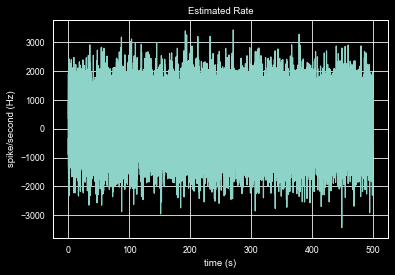

In [142]:
plt.plot(t, r_est)
plt.title('Estimated Rate')
plt.xlabel('time (s)')
plt.ylabel('spike/second (Hz)')
plt.show()

(c)

In [58]:
def plot_autocorrelation(series, max_t, norm_val = 1, xlim2=2, ylim2=2, title = 'Autocorrelation'):
    corr = np.correlate(series.ravel(), series.ravel(), 'same') * norm_val
    t = np.linspace(-0.5*max_t, 0.5*max_t, corr.shape[0])

    fig, ax = plt.subplots(2,1, figsize=(6,8))
    fig.suptitle(title)
    ax[0].plot(t, corr)
    ax[0].set_xlabel('τ (s)')
    ax[0].set_title('Full Plot')

    ax[1].plot(t, corr)
    ax[1].set_xlabel('τ (s)')
    ax[1].set_ylim(-ylim2,ylim2)
    ax[1].set_xlim(-xlim2,xlim2)
    ax[1].set_title('Zoomed Plot')

    fig.tight_layout()
    plt.show()

    return corr

In [59]:
a_corr = r_est - r0

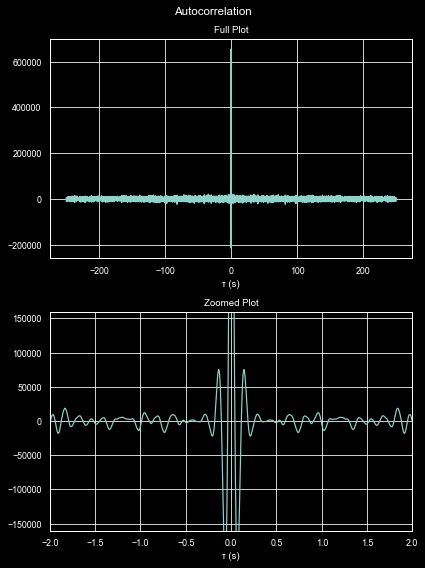

In [60]:
r_est_corr = plot_autocorrelation(a_corr, T, norm_val=del_t/T, ylim2=16e4)

(d)

In [61]:
def generate_inhomogeneous_poisson(rates, del_t):
    spikes = np.random.rand(rates.shape[0])

    max_rate = np.max(rates)
    prob = rates * del_t 

    return (spikes < prob).astype(int)    

In [62]:
poisson = generate_inhomogeneous_poisson(r_est, del_t)
print('firing rates of poisson spike train: {}'.format(np.sum(poisson)/T))

firing rates of poisson spike train: 105.338


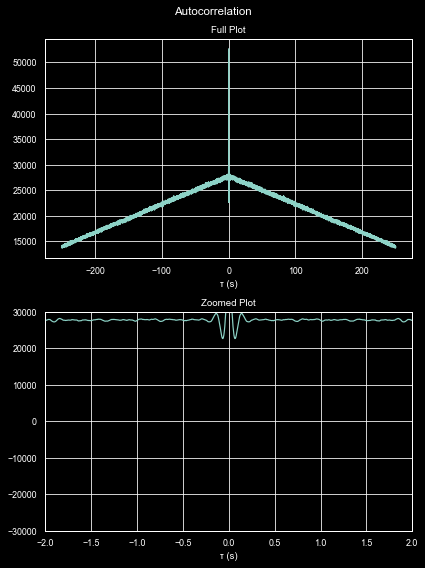

In [63]:
qpp = plot_autocorrelation(poisson, T, ylim2=3e4)

(e)

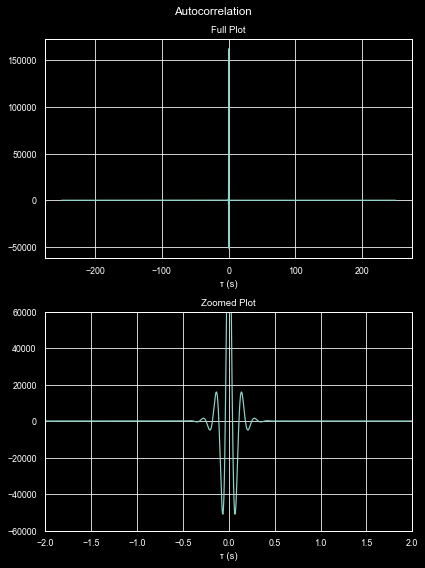

In [64]:
d_corr = plot_autocorrelation(kernel, T, ylim2 = 60000)

(f)

In [76]:
k, k_time, s_est, s_est_time = estimate_decoder(t, white_stim, r_est, del_t)

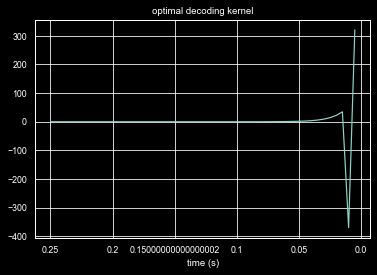

In [120]:
mid = int(k_time.shape[0]/2)
num_ticks = 50

ticks = np.arange(0, num_ticks+10, 10)
ticks_label = np.flip(np.linspace(k_time[mid], k_time[mid+num_ticks], ticks.shape[0]))

plt.plot(np.flip(k[mid:mid+num_ticks]))
plt.title('optimal decoding kernel')
plt.xticks(ticks, ticks_label)
plt.xlabel('time (s)')
plt.show()


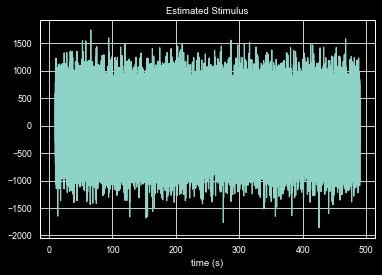

In [122]:
plt.plot(s_est_time, s_est)
plt.title('Estimated Stimulus')
plt.xlabel('time (s)')
plt.show()

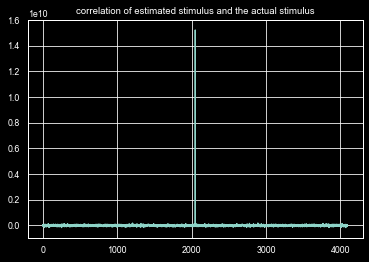

In [132]:
s_corr = np.correlate(s_est, white_stim, mode='valid')

plt.plot(s_corr)
plt.title('correlation of estimated stimulus and the actual stimulus')
plt.show()

(g)

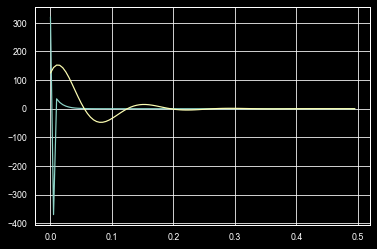

In [75]:
mid = int(k_time.shape[0]/2)

plt.plot(k_time[mid:mid+100], k[mid:mid+100])
plt.plot(t[:100], d_kern[:100])
